In [56]:
#libraries for data visualization, manupulation and numerical computation
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential            #analyze sequence of data
from keras.layers import Dense,LSTM,Dropout    #measure dropout trait


In [57]:
obj = pd.read_csv('C:/Users/hp/Desktop/jupyter/Train.csv')  #loading data
obj.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [58]:
obj.info()               


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [59]:
obj["Close"]=pd.to_numeric(obj.Close,errors='coerce')   #closing type to numeric type
obj = obj.dropna()                                      #drop non available data
train_data = obj.iloc[:,4:5].values                     #close column opted; iloc=indexlocation

In [60]:
obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [55]:
#Rescaling data
scaled_data = MinMaxScaler(feature_range=(0,1))          
train_data = scaled_data.fit_transform(train_data)      #tranforming values
train_data.shape

(1149, 1)

In [41]:
#preparing data for training
Xtrain = []
Ytrain = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    Xtrain.append(train_data[i-60:i,0]) 
    Ytrain.append(train_data[i,0])

Xtrain,Ytrain = np.array(Xtrain),np.array(Ytrain)

In [42]:
Xtrain = np.reshape(Xtrain,(Xtrain.shape[0],Xtrain.shape[1],1)) #adding the batch_size axis
Xtrain.shape

(1089, 60, 1)

In [43]:
final_model = Sequential()

final_model.add(LSTM(units=100, return_sequences = True, input_shape =(Xtrain.shape[1],1)))
final_model.add(Dropout(0.2))

final_model.add(LSTM(units=100, return_sequences = True))
final_model.add(Dropout(0.2))

final_model.add(LSTM(units=100, return_sequences = True))
final_model.add(Dropout(0.2))

final_model.add(LSTM(units=100, return_sequences = False))
final_model.add(Dropout(0.2))

final_model.add(Dense(units =1))
final_model.compile(optimizer='adam',loss="mean_squared_error")

In [44]:
hist = final_model.fit(Xtrain, Ytrain, epochs = 20, batch_size = 32, verbose=2)  #training data

Epoch 1/20
35/35 - 11s - loss: 0.0455 - 11s/epoch - 304ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0112 - 4s/epoch - 113ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0108 - 4s/epoch - 111ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0085 - 4s/epoch - 114ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0080 - 4s/epoch - 112ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0097 - 4s/epoch - 114ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0075 - 4s/epoch - 117ms/step
Epoch 8/20
35/35 - 5s - loss: 0.0076 - 5s/epoch - 149ms/step
Epoch 9/20
35/35 - 5s - loss: 0.0066 - 5s/epoch - 147ms/step
Epoch 10/20
35/35 - 5s - loss: 0.0066 - 5s/epoch - 147ms/step
Epoch 11/20
35/35 - 5s - loss: 0.0057 - 5s/epoch - 148ms/step
Epoch 12/20
35/35 - 5s - loss: 0.0060 - 5s/epoch - 144ms/step
Epoch 13/20
35/35 - 5s - loss: 0.0058 - 5s/epoch - 153ms/step
Epoch 14/20
35/35 - 5s - loss: 0.0055 - 5s/epoch - 144ms/step
Epoch 15/20
35/35 - 5s - loss: 0.0058 - 5s/epoch - 149ms/step
Epoch 16/20
35/35 - 5s - loss: 0.0055 - 5s/epoch - 148ms/step
Epoch 17/20
35/

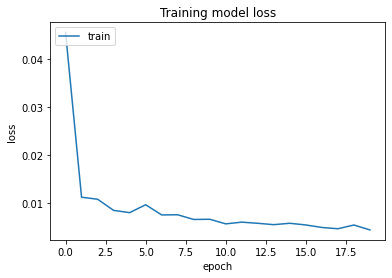

In [45]:
#visualizing loss
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [46]:
#for test data
testData = pd.read_csv('C:/Users/hp/Desktop/jupyter/Test.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = scaled_data.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [47]:
predicted_Y = final_model.predict(X_test)
predicted_Y 

6/6 [==============================] - 2s 33ms/step


array([[1.2007282],
       [1.2037597],
       [1.2154758],
       [1.2329793],
       [1.24667  ],
       [1.2456596],
       [1.2307601],
       [1.2110826],
       [1.19906  ],
       [1.1968246],
       [1.1912754],
       [1.1807308],
       [1.1710701],
       [1.16219  ],
       [1.160791 ],
       [1.1661587],
       [1.1852281],
       [1.2145758],
       [1.247369 ],
       [1.2790492],
       [1.2904475],
       [1.284594 ],
       [1.2612929],
       [1.2297375],
       [1.2026277],
       [1.1887399],
       [1.1875229],
       [1.1894982],
       [1.1836761],
       [1.1730022],
       [1.1607338],
       [1.1468079],
       [1.1260947],
       [1.1006684],
       [1.0910796],
       [1.1023386],
       [1.1263078],
       [1.1525826],
       [1.1763487],
       [1.1872953],
       [1.1978595],
       [1.211457 ],
       [1.2280322],
       [1.2437395],
       [1.2541716],
       [1.2547588],
       [1.243807 ],
       [1.2341337],
       [1.2318983],
       [1.2387276],


In [48]:
PredictedGrowth = scaled_data.inverse_transform(predicted_Y)

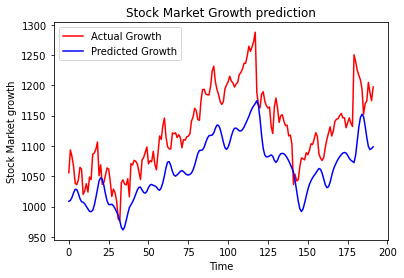

In [49]:
plt.plot(y_test, color = 'red', label = 'Actual Growth')
plt.plot(PredictedGrowth, color = 'blue', label = 'Predicted Growth')
plt.title('Stock Market Growth prediction')
plt.xlabel('Time')
plt.ylabel('Stock Market growth')
plt.legend()
plt.show()